In [119]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as mtp
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score

In [120]:
df = pd.read_csv("car.data")

In [121]:
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [122]:
df.isnull().sum()

vhigh      0
vhigh.1    0
2          0
2.1        0
small      0
low        0
unacc      0
dtype: int64

In [123]:
df.shape

(1727, 7)

In [124]:
df=df.drop('vhigh.1',axis=1)
df.head()

,vhigh,2,2.1,small,low,unacc
0,vhigh,2,2,small,med,unacc
1,vhigh,2,2,small,high,unacc
2,vhigh,2,2,med,low,unacc
3,vhigh,2,2,med,med,unacc
4,vhigh,2,2,med,high,unacc


In [125]:
df=df.drop('2.1',axis=1)
df.head()

,vhigh,2,small,low,unacc
0,vhigh,2,small,med,unacc
1,vhigh,2,small,high,unacc
2,vhigh,2,med,low,unacc
3,vhigh,2,med,med,unacc
4,vhigh,2,med,high,unacc


In [126]:
from sklearn.preprocessing import LabelEncoder
df2 = df.apply(LabelEncoder().fit_transform)

In [127]:
x = df2.iloc[:,0:4]
y = df2.iloc[:,4]
print("output",y.shape)
print("input",x.shape)

output (1727,)
input (1727, 4)


In [128]:
x_train, x_test, y_train, y_test = train_test_split(x, y,
test_size=0.3, random_state=0)
print('x_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('x_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)

x_train shape:  (1208, 4)
y_train shape:  (1208,)
x_test shape:  (519, 4)
y_test shape:  (519,)


In [129]:
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)
x_test

array([[-0.45150644, -1.35087249, -0.01408513, -1.25311926],
       [ 1.33382836, -1.35087249, -1.22943101, -1.25311926],
       [-1.34417385, -1.35087249,  1.20126074,  1.19634363],
       ...,
       [-1.34417385,  1.33604403,  1.20126074, -1.25311926],
       [ 0.44116096,  1.33604403, -1.22943101, -0.02838781],
       [-0.45150644, -0.45523365, -0.01408513, -1.25311926]])

In [130]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2 )

In [131]:
model.fit(x_train, y_train)

KNeighborsClassifier()

In [132]:
y_pred = model.predict(x_test)

In [133]:
print(model.score(x_train, y_train))

0.7218543046357616


In [134]:
print(model.score(x_test , y_test))

0.6358381502890174


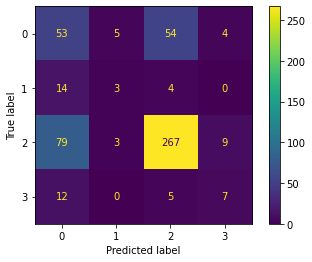

In [135]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()

plt.show()